<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Classification Project: Nthabiseng Moyeni & Alex Masina
© ExploreAI Academ

## 2401PTDS_Classification_Project

# Analysing News Articles Dataset


![](https://img.shields.io/badge/Python-3776AB.svg?style=for-the-badge&logo=Python&logoColor=white) [![Streamlit App](https://static.streamlit.io/badges/streamlit_badge_black_white.svg)](URL_TO_YOUR_APP)

<div id="main image" align="center">
  <img src="https://github.com/ereshia/2401FTDS_Classification_Project/blob/main/announcement-article-articles-copy-coverage.jpg" width="550" height="300" alt=""/>
</div>

___
## Table of Contents

<a href=#BC> [Background Context](#Background-Context)</a>

1. <a href=#one>[Importing Packages](#Importing-Packages)</a>
2. <a href=#two>[Loading Data](#Loading-Data)</a>
3. <a href=#three>[Data Preprocessing](#Data-Preprocessing) </a>
4. <a href=#four>[Model Training](#Model-Training) </a>
5. <a href=#five>[Streamlit App Deployment](#Streamlit-App-Deployment) </a>
6. <a href=#six>[Conclussion](#Conclussion) </a>

# About Project

We have been tasked with creating a classification model using Python and deploying it as a web application with Streamlit by a news outlet. The aim is to apply machine learning techniques to natural language processing tasks. This project aims to classify news articles into categories such as Business, Technology, Sports, Education, and Entertainment.

* We will go through the full workflow: loading data, preprocessing, training models, evaluating them, and preparing the final model for deployment.

# About the Data

The dataset is comprised of news articles that need to be classified into categories based on their content, including Business, Technology, Sports, Education, and Entertainment. 

**Dataset Features:**
| **Column**                                                                                  | **Description**              
|---------------------------------------------------------------------------------------------|--------------------   
| Headlines   | 	The headline or title of the news article.
| Description | A brief summary or description of the news article.
| Content | The full text content of the news article.
| URL | The URL link to the original source of the news article.
| Category | The category or topic of the news article (e.g., business, education, entertainment, sports, technology).

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>[Back to Table of Contents](#Table-of-Contents)</a>


NB: See all the libraries listed below:
---

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import streamlit as st
import joblib, os
from sklearn.feature_extraction.text import TfidfVectorizer

---
<a href=#two></a>
## **Loading Data**
<a href=#cont>[Back to Table of Contents](#Table-of-Contents)</a>



---

In [4]:
# Define the URLs for the CSV files 
test_ = 'https://raw.githubusercontent.com/Jana-Liebenberg/2401PTDS_Classification_Project/main/Data/processed/test.csv' 
train_ = 'https://raw.githubusercontent.com/Jana-Liebenberg/2401PTDS_Classification_Project/main/Data/processed/train.csv'
train_data = pd.read_csv(train_)
test_data = pd.read_csv(test_)

In [5]:
# Inspect the datasets
print(train_data.head())
print(test_data.head())

                                           headlines  \
0  RBI revises definition of politically-exposed ...   
1  NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...   
2  Akasa Air ‘well capitalised’, can grow much fa...   
3  India’s current account deficit declines sharp...   
4  States borrowing cost soars to 7.68%, highest ...   

                                         description  \
0  The central bank has also asked chairpersons a...   
1  NDTV's consolidated revenue from operations wa...   
2  The initial share sale will be open for public...   
3  The current account deficit (CAD) was 3.8 per ...   
4  The prices shot up reflecting the overall high...   

                                             content  \
0  The Reserve Bank of India (RBI) has changed th...   
1  Broadcaster New Delhi Television Ltd on Monday...   
2  Homegrown server maker Netweb Technologies Ind...   
3  India’s current account deficit declined sharp...   
4  States have been forced to pay through thei

---
<a href=#three></a>
## **Data Preprocessing**
<a href=#cont>[Back to Table of Contents](#Table-of-Contents)</a>


---

['business', 'sports', 'entertainment', 'education', 'technology']


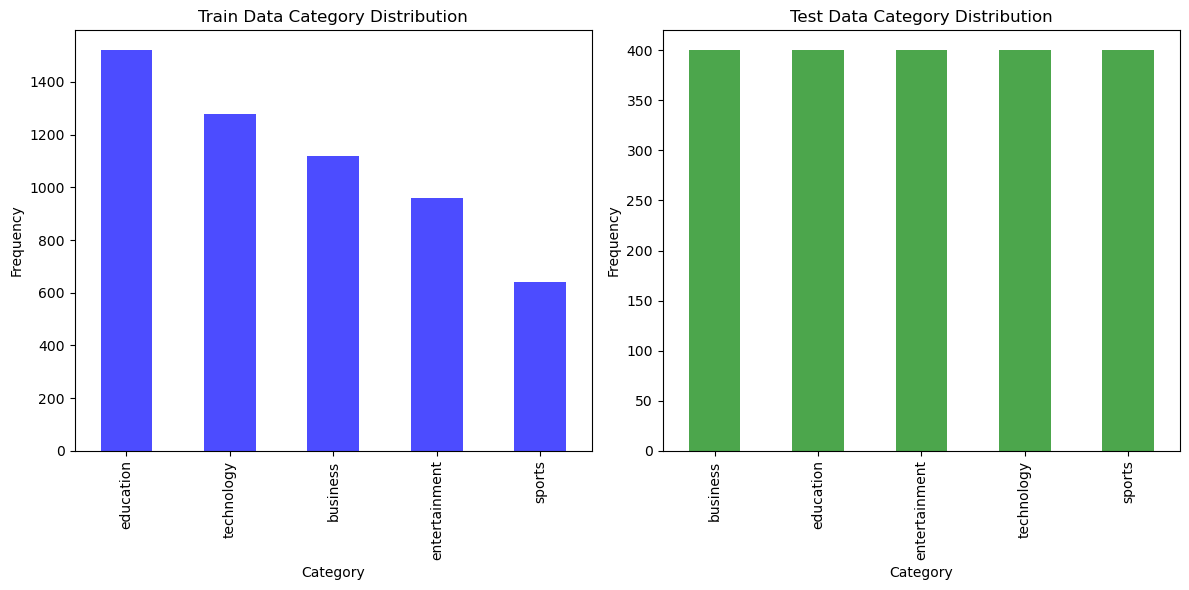

In [11]:
#Explore the categories in the data
category_labels = list(train_data.category.unique())
print(category_labels)

# Visualise the distribution of categories personality types
# Create a figure with 2 subplots side by side 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) 

# Plot the value counts for train_data in the first subplot 
train_data['category'].value_counts().plot(kind='bar', ax=axes[0], color='blue', alpha=0.7) 
axes[0].set_title('Train Data Category Distribution') 
axes[0].set_xlabel('Category') 
axes[0].set_ylabel('Frequency') 

# Plot the value counts for test_data in the second subplot 
test_data['category'].value_counts().plot(kind='bar', ax=axes[1], color='green', alpha=0.7) 
axes[1].set_title('Test Data Category Distribution') 
axes[1].set_xlabel('Category') 
axes[1].set_ylabel('Frequency') 

# Adjust the layout and display the combined plot 
plt.tight_layout() 
plt.show()



The two datasets show completely different distributions,test data seems more balanced than the training data. Some categories are more frequent in the test data but less frequent in the training data, it could impact the performance of our model. We need to understand these differences because a significant difference in category distribution might lead to potential overfitting or underfitting.

Differences could also indicate issues with data quality or collection processes. It’s important to ensure that both training and test datasets are representative of the same population or domain.

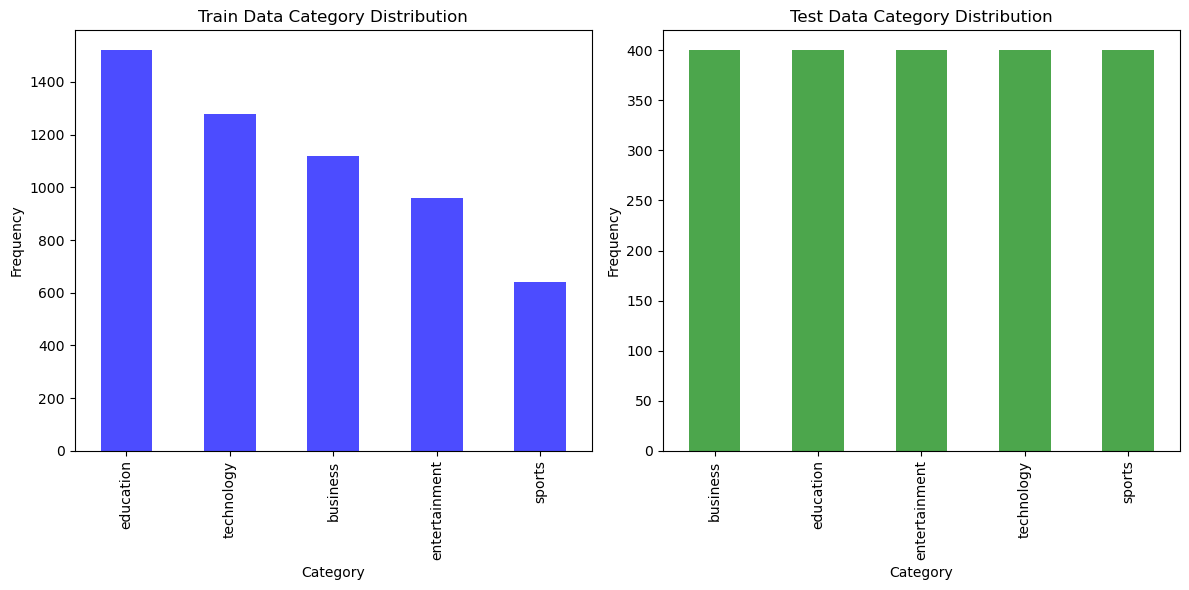

In [13]:

# Remove missing values
train_data.dropna(subset=['content', 'category'], inplace=True)
test_data.dropna(subset=['content'], inplace=True)

# Encode categories
y_train = train_data['category'].astype('category').cat.codes
y_test = test_data['category'].astype('category').cat.codes

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_data['content'])
X_test = vectorizer.transform(test_data['content'])


# Plotting the charts 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) 

# Plot the value counts for train_data in the first subplot 
train_data['category'].value_counts().plot(kind='bar', ax=axes[0], color='blue', alpha=0.7) 
axes[0].set_title('Train Data Category Distribution') 
axes[0].set_xlabel('Category') 
axes[0].set_ylabel('Frequency') 

# Plot the value counts for test_data in the second subplot 
test_data['category'].value_counts().plot(kind='bar', ax=axes[1], color='green', alpha=0.7) 
axes[1].set_title('Test Data Category Distribution') 
axes[1].set_xlabel('Category') 
axes[1].set_ylabel('Frequency') 

# Adjust the layout and display the combined plot 
plt.tight_layout()
plt.show()

The test data appears to be more evenly distributed across different categories. This means that it has a more uniform representation of each category, which is generally a good thing for evaluating model performance. The training data is imbalanced, with certain categories being overrepresented, this might affect how well our model can learn to classify the underrepresented categories.

A balanced test set ensures that our evaluation metrics, such as accuracy, precision, recall, and F1-score, are reliable and not biased towards any particular category. However, an imbalanced training dataset can lead to overfitting, where the model performs well on the training data but poorly on unseen data, especially for underrepresented categories.

To mitigate this, we could consider techniques such as oversampling the minority classes, undersampling the majority classes, or using algorithms that handle imbalanced data better.

In [15]:
#Verify the number of instances per category in both datasets to understand the exact distribution.

print("Train Data Distribution:\n", train_data['category'].value_counts())
print("\nTest Data Distribution:\n", test_data['category'].value_counts())


Train Data Distribution:
 category
education        1520
technology       1280
business         1120
entertainment     960
sports            640
Name: count, dtype: int64

Test Data Distribution:
 category
business         400
education        400
entertainment    400
technology       400
sports           400
Name: count, dtype: int64


We will leave the data as is, to check if the model is overfitting

---
<a href=#four></a>
## **Model Training**
<a href=#cont>[Back to Table of Contents](#Table-of-Contents)</a>

---

In [14]:
# Define models 
models = { 
    "Logistic Regression": LogisticRegression(max_iter=200), 
    "Random Forest": RandomForestClassifier(), 
    "Support Vector Machine": SVC() } 



# Train and evaluate models with cross-validation 
results = {} 
for model_name, model in models.items(): 
    model.fit(X_train, y_train) 
    predictions = model.predict(X_test) 
    accuracy = accuracy_score(y_test, predictions) 
    results[model_name] = { 
                           "Accuracy": accuracy, 
                           "Classification Report": classification_report(y_test, predictions, target_names=train_data['category'].unique()) } 
    
# Save the best model
best_model_name = max(results, key=lambda x: results[x]['Accuracy'])
best_model = models[best_model_name]
joblib.dump(best_model, "best_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

print(f"Model: {model_name}\nAccuracy: {accuracy}\n") 
print(results[model_name]['Classification Report'])



Model: Support Vector Machine
Accuracy: 0.9755

               precision    recall  f1-score   support

     business       0.98      0.95      0.97       400
       sports       0.99      0.99      0.99       400
entertainment       0.99      0.98      0.99       400
    education       0.99      0.98      0.98       400
   technology       0.93      0.98      0.95       400

     accuracy                           0.98      2000
    macro avg       0.98      0.98      0.98      2000
 weighted avg       0.98      0.98      0.98      2000



An accuracy of 97.55% is fantastic. 

Here's a quick breakdown of what the metrics mean:

* Precision: The proportion of true positives out of the total predicted positives. High precision means that when your model predicts a certain class, it's usually correct.

* Recall: The proportion of true positives out of the total actual positives. High recall means that your model can identify most of the actual positives.

* F1-Score: The harmonic mean of precision and recall, providing a balance between the two. A high F1-score indicates good overall performance.

* Support: The number of true instances for each class in the dataset.

For each category (business, sports, entertainment, education, technology), your Support Vector Machine (SVM) model shows strong performance across all metrics.


Interpretation
* High Accuracy: With an accuracy of 97.55%, the model performs very well, correctly classifying the vast majority of samples.

* Consistency Across Classes: The high precision, recall, and F1-scores across all classes indicate that the model is consistent and reliable in its predictions.

* Technology Class: While the technology class has slightly lower precision (0.93) compared to the other classes, it still maintains a high recall (0.98), meaning it correctly identifies most of the technology samples with some false positives.

Overall, our SVM model demonstrates excellent performance with high accuracy and consistency across different classes.

---
<a href=#five></a>
## **Streamlit App Deployment**
<a href=#cont>[Back to Table of Contents](#Table-of-Contents)</a>

---

This code can be found on the Classification_app.py script

---
<a href=#six></a>
## **Conclussion**
<a href=#cont>[Back to Table of Contents](#Table-of-Contents)</a>

---

This notebook provides a complete pipeline for the news classification task. 
Further steps could include hyperparameter tuning, exploring additional models, and enhancing the Streamlit app. it is important to note that our model might overfit to the overrepresented categories (in the training data), making it less generalizable to new, unseen data, especially since it has a different distribution to the test set. In the future we could use algorithms that are robust to imbalanced data or apply class weights to handle the imbalance.

### Team Members

* Alex Masina

* Nthabiseng Moyeni

Trello Board link: https://trello.com/b/EWjZ6C5W/alex-and-nthabi-project

GitHub link: https://github.com/NthabisengMoyeni/Classification-Project-Alex-and-Nthaby

Presentation: https://docs.google.com/presentation/d/17DVjpFBiOR9ya4pG-JuFaX9raEJo2tKb2GguRICihmk/edit?usp=sharing


#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>